#four-hourly resampling - Intelligence

I experimented with different parameters for each model, and even though some do output warning messages, the results are better.



In [159]:
!rm -rf IoT_project_1
!git clone https://github.com/paflou/IoT_project_1
import pandas as pd
%load_ext autoreload
%autoreload 2

Cloning into 'IoT_project_1'...
remote: Enumerating objects: 3570, done.
remote: Counting objects: 100% (3570/3570), done.
remote: Compressing objects: 100% (1195/1195), done.
remote: Total 3570 (delta 2363), reused 3549 (delta 2352), pack-reused 0 (from 0)
Receiving objects: 100% (3570/3570), 5.10 MiB | 16.56 MiB/s, done.
Resolving deltas: 100% (2363/2363), done.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data processing

Load the csv file with the data using the pandas library.

In [160]:
df = pd.read_csv("IoT_project_1/my_nullnet/export.csv")
print(df)

       ID                      Time  Count  Temperature  Humidity
0       0  2025-05-14T12:34:02.386Z      0        26.73     52.93
1       1  2025-05-14T12:34:05.741Z      0        27.50     53.12
2       0  2025-05-14T12:34:22.390Z      1        26.73     53.63
3       1  2025-05-14T12:34:25.767Z      1        27.20     55.70
4       0  2025-05-14T12:34:42.416Z      2        26.76     53.31
...    ..                       ...    ...          ...       ...
43395   0  2025-05-19T13:08:12.259Z  21703        23.68     53.15
43396   1  2025-05-19T13:08:17.106Z  21703        24.73     52.40
43397   0  2025-05-19T13:08:32.259Z  21704        23.70     53.90
43398   1  2025-05-19T13:08:37.068Z  21704        24.73     52.40
43399   0  2025-05-19T13:08:52.243Z  21705        23.68     53.12

[43400 rows x 5 columns]


Change the dtype of the "time" column to datetime64
* tip: use the pd.to_datetime function()

:Create a new dataframe with the "time" column and the column with sensor data of your interest

In [161]:
df_temp = df[['Time', 'Temperature']].copy()
df_hum = df[['Time', 'Humidity']].copy()

df_hum['Time'] = pd.to_datetime(df['Time'])
df_temp['Time'] = pd.to_datetime(df['Time'])

print(df_temp)
print(df_hum)

                                  Time  Temperature
0     2025-05-14 12:34:02.386000+00:00        26.73
1     2025-05-14 12:34:05.741000+00:00        27.50
2     2025-05-14 12:34:22.390000+00:00        26.73
3     2025-05-14 12:34:25.767000+00:00        27.20
4     2025-05-14 12:34:42.416000+00:00        26.76
...                                ...          ...
43395 2025-05-19 13:08:12.259000+00:00        23.68
43396 2025-05-19 13:08:17.106000+00:00        24.73
43397 2025-05-19 13:08:32.259000+00:00        23.70
43398 2025-05-19 13:08:37.068000+00:00        24.73
43399 2025-05-19 13:08:52.243000+00:00        23.68

[43400 rows x 2 columns]
                                  Time  Humidity
0     2025-05-14 12:34:02.386000+00:00     52.93
1     2025-05-14 12:34:05.741000+00:00     53.12
2     2025-05-14 12:34:22.390000+00:00     53.63
3     2025-05-14 12:34:25.767000+00:00     55.70
4     2025-05-14 12:34:42.416000+00:00     53.31
...                                ...       ...
43395 2

:At this point it is advisasble to resample the dataframe (i.e. hourly) and create a new one, as the data is sampled per 20 seconds, and the statistical models will not be able to handle all the data at once.


Tips:
* set the index of the dataframe to be the "time" column
* use .resample() of the pandas library function to resample the dataset and get the mean for each timestamp you create
* store this new dataframe to an appropriately named one.

In [162]:
df_hum.set_index('Time', inplace=True)
df_temp.set_index('Time', inplace=True)

temperature_df_hourly = df_temp.resample('4h').mean()
humidity_df_hourly = df_hum.resample('4h').mean()
print(temperature_df_hourly)
print(humidity_df_hourly)

                           Temperature
Time                                  
2025-05-14 12:00:00+00:00    25.973867
2025-05-14 16:00:00+00:00    25.941285
2025-05-14 20:00:00+00:00    26.534427
2025-05-15 00:00:00+00:00    26.805160
2025-05-15 04:00:00+00:00    25.985792
2025-05-15 08:00:00+00:00    25.837576
2025-05-15 12:00:00+00:00    25.658451
2025-05-15 16:00:00+00:00    25.544414
2025-05-15 20:00:00+00:00    25.988111
2025-05-16 00:00:00+00:00    26.025868
2025-05-16 04:00:00+00:00    25.582201
2025-05-16 08:00:00+00:00    25.301465
2025-05-16 12:00:00+00:00    25.483535
2025-05-16 16:00:00+00:00    25.499924
2025-05-16 20:00:00+00:00    25.675178
2025-05-17 00:00:00+00:00    25.356187
2025-05-17 04:00:00+00:00    24.933458
2025-05-17 08:00:00+00:00    24.800639
2025-05-17 12:00:00+00:00    24.926549
2025-05-17 16:00:00+00:00    24.822799
2025-05-17 20:00:00+00:00    24.959395
2025-05-18 00:00:00+00:00    25.016625
2025-05-18 04:00:00+00:00    24.734285
2025-05-18 08:00:00+00:00

\Use the new dataframe you created to create an array with the values of the sensor and name it approprietly.

# Statistical Models

## ARIMA model

In [163]:
# import the needed packages
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

Set a new variable that will hold the column of the dataframe with the sensor data as a list and name it approprietly.

In [164]:
temperature_series = temperature_df_hourly['Temperature']
humidity_series = humidity_df_hourly['Humidity']
print(temperature_df_hourly.columns)
print(humidity_df_hourly.columns)

Index(['Temperature'], dtype='object')
Index(['Humidity'], dtype='object')


**Split the dataset into training and testing sets (70-30)**

In [165]:
train_temperature = temperature_series[:int(len(temperature_series) * 0.7)]
test_temperature = temperature_series[int(len(temperature_series) * 0.7):]

train_humidity = humidity_series[:int(len(humidity_series) * 0.7)]
test_humidity = humidity_series[int(len(humidity_series) * 0.7):]


Load an ARIMA model and fit it to the data

In [166]:
# Temperature model
model_temp = ARIMA(train_temperature, order=(5, 1, 1))
model_temp_fit = model_temp.fit()

# Humidity model
model_hum = ARIMA(train_humidity, order=(3, 1, 1))
model_hum_fit = model_hum.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Make a forecast for as many steps as you want (prefferebly the same number of values as test set).

In [167]:
forecast_temp = model_temp_fit.forecast(steps=len(test_temperature))
forecast_hum = model_hum_fit.forecast(steps=len(test_humidity))

Plot the results Actual vs Predicted values using matplotlib.

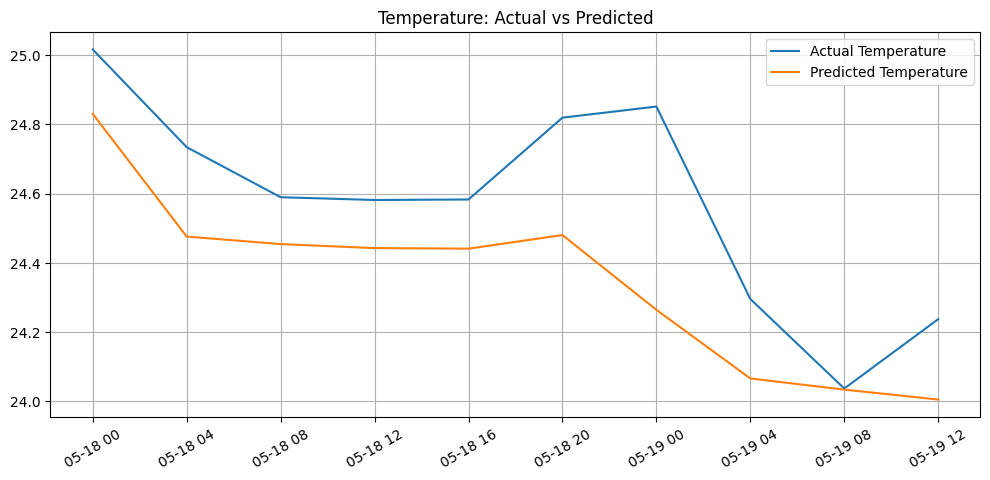

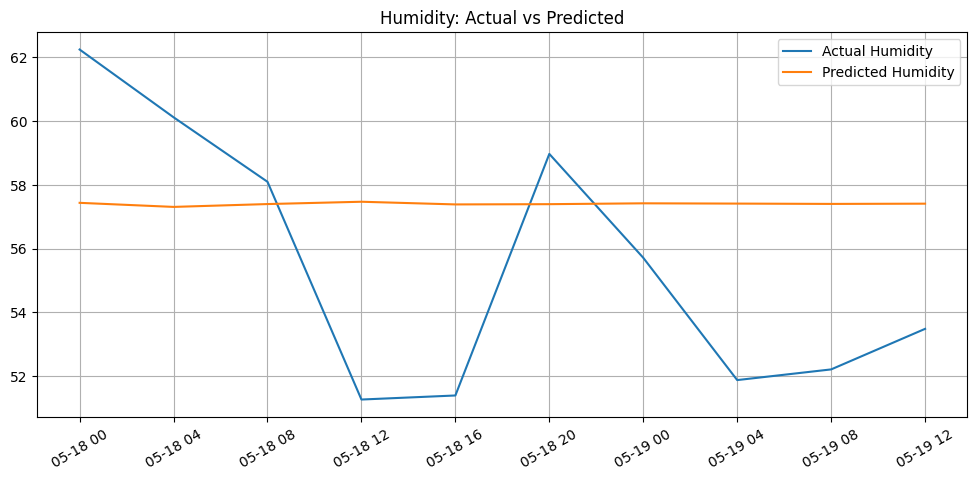

In [168]:
# Temperature plot
plt.figure(figsize=(12, 5))
plt.plot(test_temperature, label='Actual Temperature')
plt.plot(forecast_temp, label='Predicted Temperature')
plt.title('Temperature: Actual vs Predicted')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.show()

# Humidity plot
plt.figure(figsize=(12, 5))
plt.plot(test_humidity, label='Actual Humidity')
plt.plot(forecast_hum, label='Predicted Humidity')
plt.title('Humidity: Actual vs Predicted')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.show()


Calculate the below metrics for the model

In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# temperature
y_true = test_temperature
y_pred = forecast_temp

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)

# Print results
print("Temperature:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape * 100:.2f}%")

# Humidity
y_true = test_humidity
y_pred = forecast_hum

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)

# Print results
print("\nHumidity:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape * 100:.2f}%")

Temperature:
MAE: 0.225
MSE: 0.073
RMSE: 0.270
MAPE: 0.91%

Humidity:
MAE: 3.849
MSE: 18.472
RMSE: 4.298
MAPE: 7.11%


## SARIMAX model
For the sarima model the same steps as the ARIMA model should be followed. Only the model call changes.

In [170]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Temperature SARIMAX model
model_sar_temp = SARIMAX(train_temperature, order=(1,1,1), seasonal_order=(1,1,1,3))
model_sar_temp_fit = model_sar_temp.fit()

# Humidity SARIMAX model
model_sar_hum = SARIMAX(train_humidity, order=(1,1,2), seasonal_order=(1,1,1,3))
model_sar_hum_fit = model_sar_hum.fit()


In [171]:
# Fit temperature SARIMAX model
model_sar_temp_fit = model_sar_temp.fit()

# Fit humidity SARIMAX model
model_sar_hum_fit = model_sar_hum.fit()


In [172]:
# Forecast temperature
forecast_temp = model_sar_temp_fit.forecast(steps=len(test_temperature))

# Forecast humidity
forecast_hum = model_sar_hum_fit.forecast(steps=len(test_humidity))


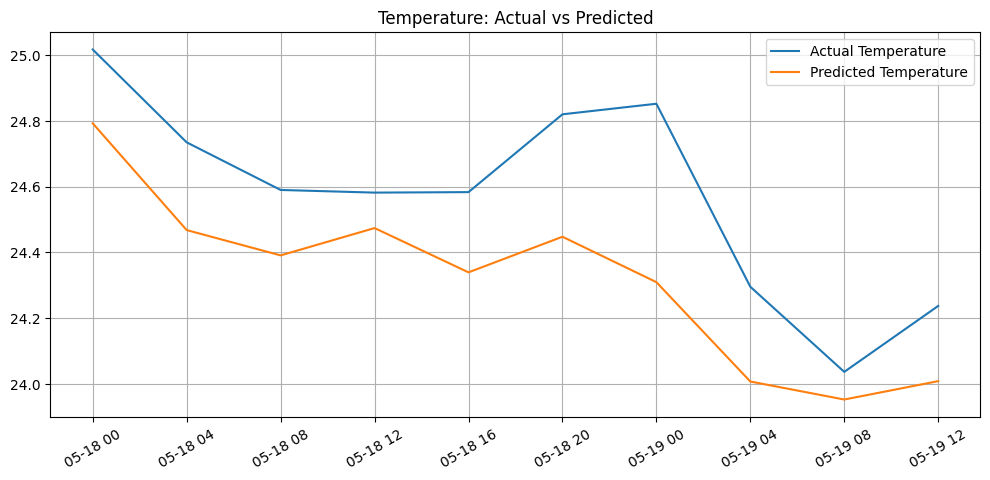

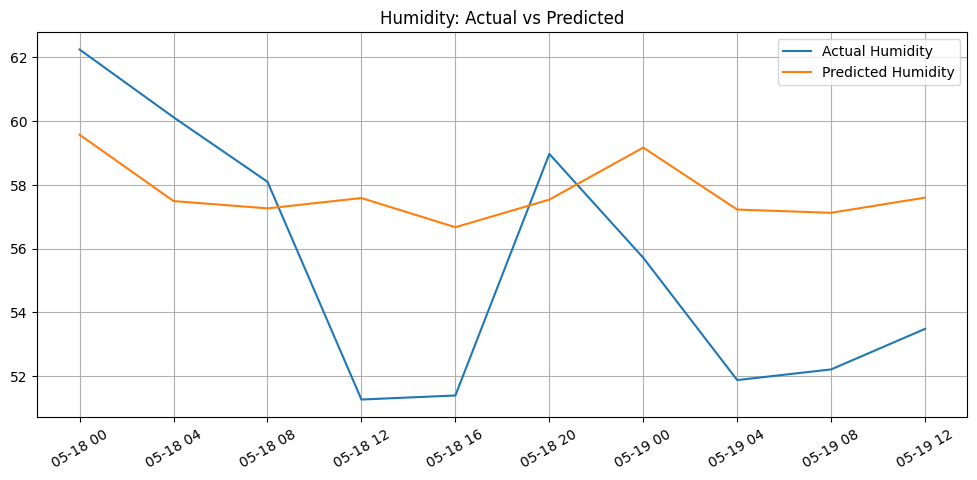

In [173]:
import matplotlib.pyplot as plt

# Temperature plot
plt.figure(figsize=(12, 5))
plt.plot(test_temperature, label='Actual Temperature')
plt.plot(forecast_temp, label='Predicted Temperature')
plt.title('Temperature: Actual vs Predicted')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.show()

# Humidity plot
plt.figure(figsize=(12, 5))
plt.plot(test_humidity, label='Actual Humidity')
plt.plot(forecast_hum, label='Predicted Humidity')
plt.title('Humidity: Actual vs Predicted')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.show()

Calculate the below metrics for the model

In [174]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Temperature metrics
mae_temp = mean_absolute_error(test_temperature, forecast_temp)
mse_temp = mean_squared_error(test_temperature, forecast_temp)
rmse_temp = np.sqrt(mse_temp)
mape_temp = mean_absolute_percentage_error(test_temperature, forecast_temp)

print("Temperature Metrics:")
print(f"MAE: {mae_temp:.3f}")
print(f"MSE: {mse_temp:.3f}")
print(f"RMSE: {rmse_temp:.3f}")
print(f"MAPE: {mape_temp * 100:.2f}%\n")

# Humidity metrics
mae_hum = mean_absolute_error(test_humidity, forecast_hum)
mse_hum = mean_squared_error(test_humidity, forecast_hum)
rmse_hum = np.sqrt(mse_hum)
mape_hum = mean_absolute_percentage_error(test_humidity, forecast_hum)

print("Humidity Metrics:")
print(f"MAE: {mae_hum:.3f}")
print(f"MSE: {mse_hum:.3f}")
print(f"RMSE: {rmse_hum:.3f}")
print(f"MAPE: {mape_hum * 100:.2f}%")

Temperature Metrics:
MAE: 0.256
MSE: 0.081
RMSE: 0.284
MAPE: 1.04%

Humidity Metrics:
MAE: 3.704
MSE: 16.657
RMSE: 4.081
MAPE: 6.88%


# Neural Network Models

## Data Processing and preparation

For the machine learning models the processing of the dataset changes a bit.

In [175]:
# For temperature
temperature = df_temp['Temperature'].resample('4h').mean()

mean_temp = temperature.mean()
std_temp = temperature.std()
temperature_norm = (temperature - mean_temp) / std_temp

print("Temperature Mean:", mean_temp)
print("Temperature Std:", std_temp)


# For humidity
humidity = df_hum['Humidity'].resample('4h').mean()

mean_hum = humidity.mean()
std_hum = humidity.std()
humidity_norm = (humidity - mean_hum) / std_hum

print("Humidity Mean:", mean_hum)
print("Humidity Std:", std_hum)


Temperature Mean: 25.2703333226298
Temperature Std: 0.6793250818238451
Humidity Mean: 56.340874775528405
Humidity Std: 3.253931656755673


Again, it is suggested you have already resampled the data as training with a large amount of instances coulf be really slow especially withoutt a dedicated GPU for acceleration. For a Machine Learning Neural Network Model we need to transform our data into information and target values. To do that we must create an array of features (past values) with a target (value after these 10 values for example).

In [176]:
look_back = 5

# Temperature sequences
X_temp = []
y_temp = []
for i in range(look_back, len(temperature_norm)):
    X_temp.append(temperature_norm[i-look_back:i])
    y_temp.append(temperature_norm[i])

X_temp = np.array(X_temp)
y_temp = np.array(y_temp)

train_size_temp = int(len(X_temp) * 0.7)
X_train_temp, y_train_temp = X_temp[:train_size_temp], y_temp[:train_size_temp]
X_test_temp, y_test_temp = X_temp[train_size_temp:], y_temp[train_size_temp:]

X_train_temp = np.reshape(X_train_temp, (X_train_temp.shape[0], X_train_temp.shape[1], 1))
X_test_temp = np.reshape(X_test_temp, (X_test_temp.shape[0], X_test_temp.shape[1], 1))


# Humidity sequences
X_hum = []
y_hum = []
for i in range(look_back, len(humidity_norm)):
    X_hum.append(humidity_norm[i-look_back:i])
    y_hum.append(humidity_norm[i])

X_hum = np.array(X_hum)
y_hum = np.array(y_hum)

train_size_hum = int(len(X_hum) * 0.7)
X_train_hum, y_train_hum = X_hum[:train_size_hum], y_hum[:train_size_hum]
X_test_hum, y_test_hum = X_hum[train_size_hum:], y_hum[train_size_hum:]

X_train_hum = np.reshape(X_train_hum, (X_train_hum.shape[0], X_train_hum.shape[1], 1))
X_test_hum = np.reshape(X_test_hum, (X_test_hum.shape[0], X_test_hum.shape[1], 1))


/tmp/ipython-input-176-3958443816.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_temp.append(temperature_norm[i])
/tmp/ipython-input-176-3958443816.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hum.append(humidity_norm[i])


The above requires array comprehension but as it the not the focus of this project please just change the look back according to the dataset you created (resample, original dataset etc.)

#### LSTM

In [177]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [178]:
# Temperature LSTM model
model_temp = Sequential()
model_temp.add(LSTM(30, input_shape=(look_back, 1)))
model_temp.add(Dense(1))
model_temp.compile(loss='mean_squared_error', optimizer='adam')

# Humidity LSTM model
model_hum = Sequential()
model_hum.add(LSTM(30, input_shape=(look_back, 1)))
model_hum.add(Dense(1))
model_hum.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [179]:
# Train temperature LSTM model
history_temp = model_temp.fit(X_train_temp, y_train_temp, epochs=100, batch_size=32)

# Train humidity LSTM model
history_hum = model_hum.fit(X_train_hum, y_train_hum, epochs=100, batch_size=32)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3214
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3109
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3009
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2914
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2824
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.2739
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2659
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2583
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2512
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2444
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2379
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2317
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2258
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2201
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2146
Epoch 16/100
1/1 ━━━━

Plot the training accuracy over the course of the training and loss from the model.history paramater

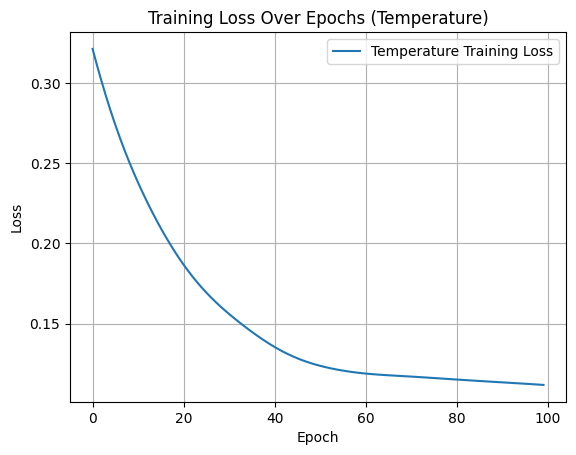

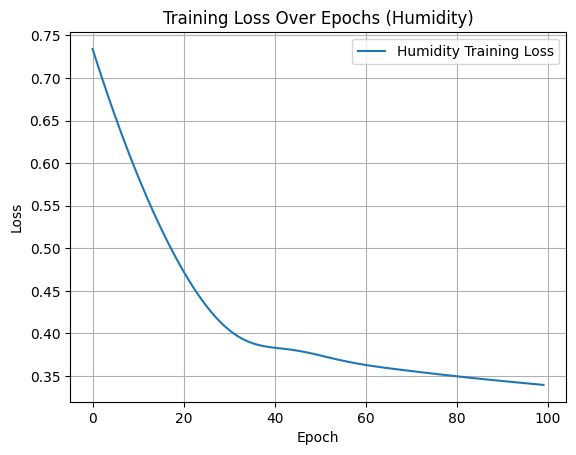

In [180]:
plt.plot(history_temp.history['loss'], label='Temperature Training Loss')
plt.title('Training Loss Over Epochs (Temperature)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history_hum.history['loss'], label='Humidity Training Loss')
plt.title('Training Loss Over Epochs (Humidity)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


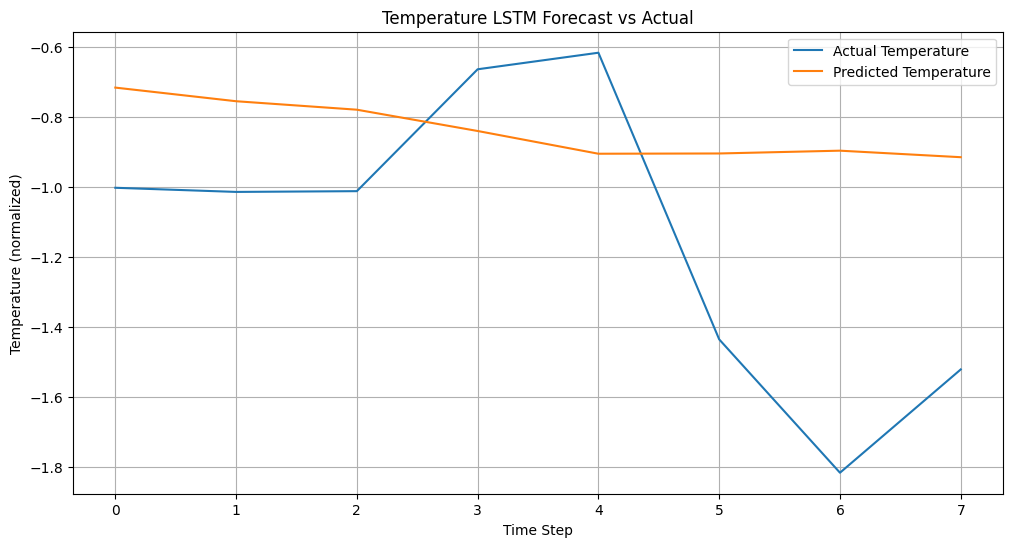

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


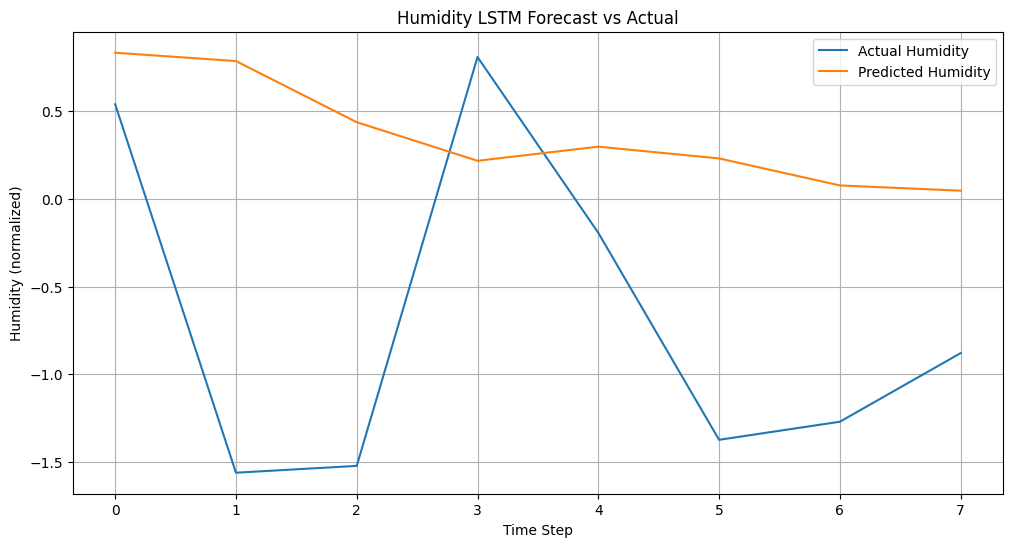

In [181]:
# Predict temperature
forecast_temp = model_temp.predict(X_test_temp)

plt.figure(figsize=(12, 6))
plt.plot(y_test_temp, label='Actual Temperature')
plt.plot(forecast_temp, label='Predicted Temperature')
plt.title('Temperature LSTM Forecast vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Temperature (normalized)')
plt.legend()
plt.grid(True)
plt.show()


# Predict humidity
forecast_hum = model_hum.predict(X_test_hum)

plt.figure(figsize=(12, 6))
plt.plot(y_test_hum, label='Actual Humidity')
plt.plot(forecast_hum, label='Predicted Humidity')
plt.title('Humidity LSTM Forecast vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Humidity (normalized)')
plt.legend()
plt.grid(True)
plt.show()


Calculate the mean_absolute_error, mean_squared_error and mean_absolute_percentage_error and the accuracy of the model.

In [182]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# For Temperature
y_pred_temp = forecast_temp.flatten()

mae_temp = mean_absolute_error(y_test_temp, y_pred_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
rmse_temp = np.sqrt(mse_temp)
mape_temp = np.mean(np.abs((y_test_temp - y_pred_temp) / y_test_temp)) * 100
accuracy_temp = 100 - mape_temp

print("Temperature Metrics:")
print(f"MAE: {mae_temp:.3f}")
print(f"MSE: {mse_temp:.3f}")
print(f"RMSE: {rmse_temp:.3f}")
print(f"MAPE: {mape_temp:.2f}%")
print(f"Accuracy: {accuracy_temp:.2f}%\n")


# For Humidity
y_pred_hum = forecast_hum.flatten()

mae_hum = mean_absolute_error(y_test_hum, y_pred_hum)
mse_hum = mean_squared_error(y_test_hum, y_pred_hum)
rmse_hum = np.sqrt(mse_hum)
mape_hum = np.mean(np.abs((y_test_hum - y_pred_hum) / y_test_hum)) * 100
accuracy_hum = 100 - mape_hum

print("Humidity Metrics:")
print(f"MAE: {mae_hum:.3f}")
print(f"MSE: {mse_hum:.3f}")
print(f"RMSE: {rmse_hum:.3f}")
print(f"MAPE: {mape_hum:.2f}%")
print(f"Accuracy: {accuracy_hum:.2f}%")


Temperature Metrics:
MAE: 0.413
MSE: 0.227
RMSE: 0.476
MAPE: 34.77%
Accuracy: 65.23%

Humidity Metrics:
MAE: 1.195
MSE: 1.909
RMSE: 1.382
MAPE: 123.52%
Accuracy: -23.52%


#### RNN Model

\Bonus: Only the model changes between these two examples. Create your own SimpleRNN model using the LSTM model as a guidline and calculate the same training metrics as before as well as visualize the same results.

In [183]:
from keras.layers import  SimpleRNN

In [184]:
# Temperature SimpleRNN model
model_temp_rnn = Sequential()
model_temp_rnn.add(SimpleRNN(50, input_shape=(look_back, 1)))
model_temp_rnn.add(Dense(1))
model_temp_rnn.compile(loss='mean_squared_error', optimizer='adam')

# Humidity SimpleRNN model
model_hum_rnn = Sequential()
model_hum_rnn.add(SimpleRNN(50, input_shape=(look_back, 1)))
model_hum_rnn.add(Dense(1))
model_hum_rnn.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [185]:
# Train temperature RNN model
history_temp = model_temp.fit(X_train_temp, y_train_temp, epochs=100, batch_size=32)

# Train humidity RNN model
history_hum = model_hum.fit(X_train_hum, y_train_hum, epochs=100, batch_size=32)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1115
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1113
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1111
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1109
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1107
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1105
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1103
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1101
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1098
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1096
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.1094
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1092
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.1089
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1087
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1084
Epoch 16/100
1/1 ━

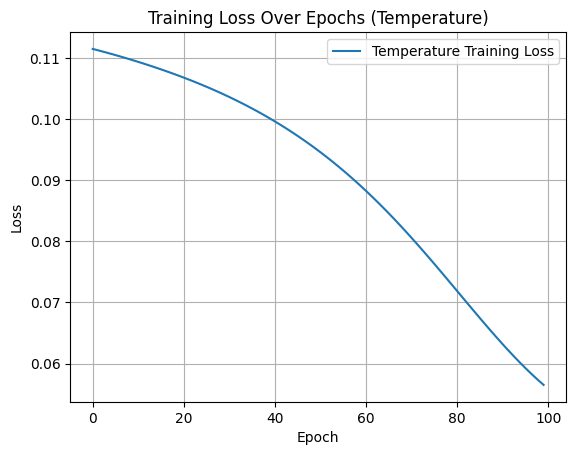

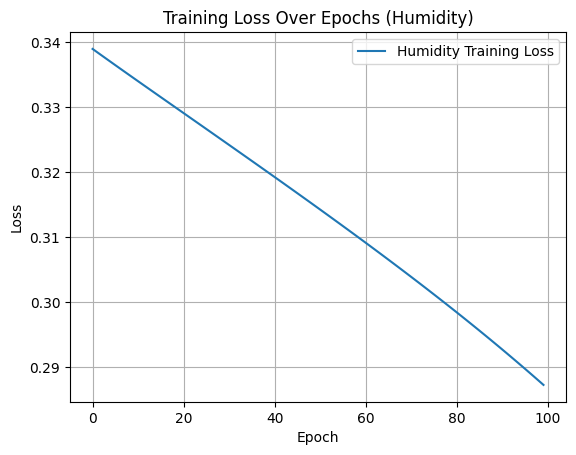

In [186]:
plt.plot(history_temp.history['loss'], label='Temperature Training Loss')
plt.title('Training Loss Over Epochs (Temperature)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history_hum.history['loss'], label='Humidity Training Loss')
plt.title('Training Loss Over Epochs (Humidity)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


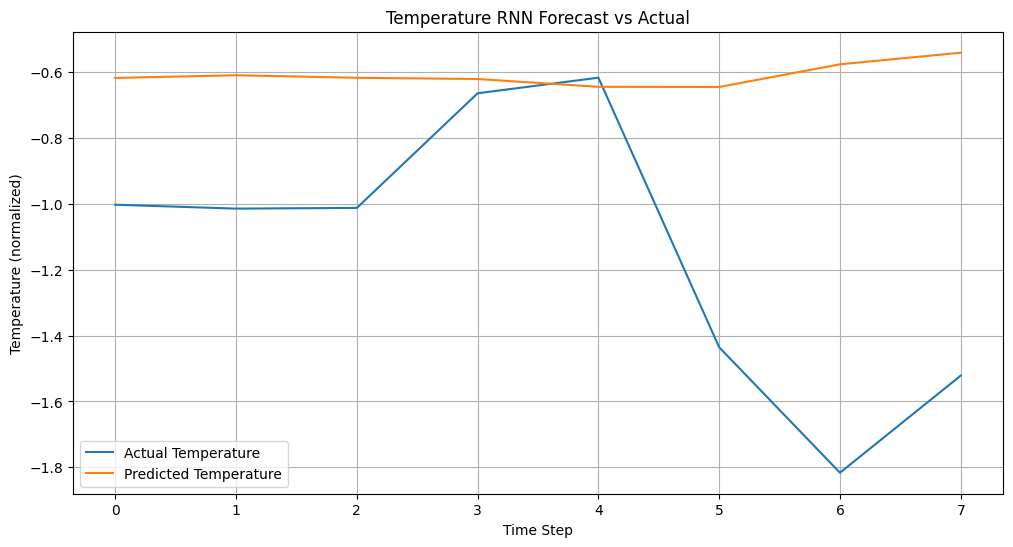

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


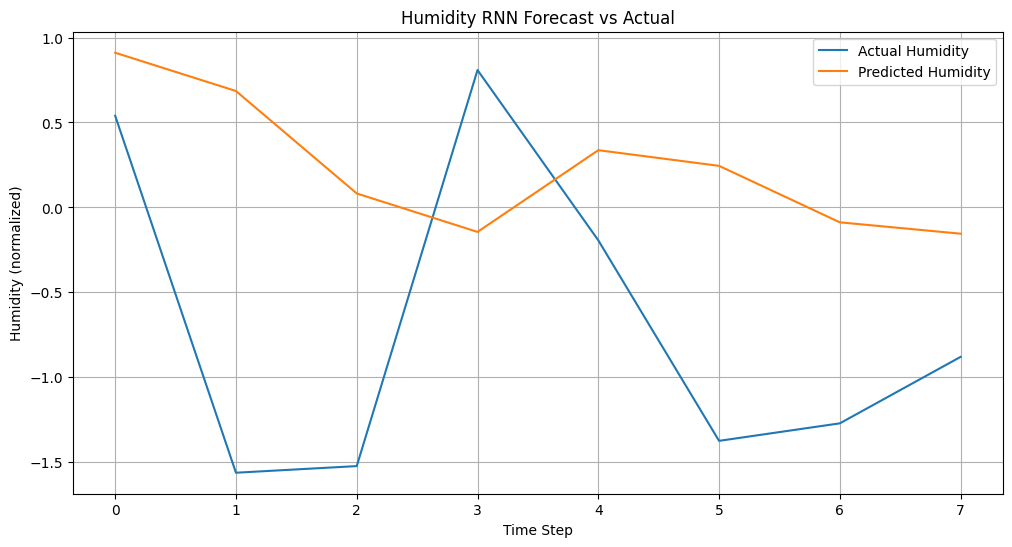

In [187]:
# Predict temperature
forecast_temp = model_temp.predict(X_test_temp)

plt.figure(figsize=(12, 6))
plt.plot(y_test_temp, label='Actual Temperature')
plt.plot(forecast_temp, label='Predicted Temperature')
plt.title('Temperature RNN Forecast vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Temperature (normalized)')
plt.legend()
plt.grid(True)
plt.show()


# Predict humidity
forecast_hum = model_hum.predict(X_test_hum)

plt.figure(figsize=(12, 6))
plt.plot(y_test_hum, label='Actual Humidity')
plt.plot(forecast_hum, label='Predicted Humidity')
plt.title('Humidity RNN Forecast vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Humidity (normalized)')
plt.legend()
plt.grid(True)
plt.show()


In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# For Temperature
y_pred_temp = forecast_temp.flatten()

mae_temp = mean_absolute_error(y_test_temp, y_pred_temp)
mse_temp = mean_squared_error(y_test_temp, y_pred_temp)
rmse_temp = np.sqrt(mse_temp)
mape_temp = np.mean(np.abs((y_test_temp - y_pred_temp) / y_test_temp)) * 100
accuracy_temp = 100 - mape_temp

print("Temperature Metrics:")
print(f"MAE: {mae_temp:.3f}")
print(f"MSE: {mse_temp:.3f}")
print(f"RMSE: {rmse_temp:.3f}")
print(f"MAPE: {mape_temp:.2f}%")
print(f"Accuracy: {accuracy_temp:.2f}%\n")


# For Humidity
y_pred_hum = forecast_hum.flatten()

mae_hum = mean_absolute_error(y_test_hum, y_pred_hum)
mse_hum = mean_squared_error(y_test_hum, y_pred_hum)
rmse_hum = np.sqrt(mse_hum)
mape_hum = np.mean(np.abs((y_test_hum - y_pred_hum) / y_test_hum)) * 100
accuracy_hum = 100 - mape_hum

print("Humidity Metrics:")
print(f"MAE: {mae_hum:.3f}")
print(f"MSE: {mse_hum:.3f}")
print(f"RMSE: {rmse_hum:.3f}")
print(f"MAPE: {mape_hum:.2f}%")
print(f"Accuracy: {accuracy_hum:.2f}%")


Temperature Metrics:
MAE: 0.534
MSE: 0.450
RMSE: 0.671
MAPE: 39.55%
Accuracy: 60.45%

Humidity Metrics:
MAE: 1.154
MSE: 1.687
RMSE: 1.299
MAPE: 125.38%
Accuracy: -25.38%


# Final guidelines
* You can use this notebook or create multiple notebooks as you fit (i.e. for each sensor, for each model).
* Do not hesitate to play around with hyper parapeters optimization. While the end goal is not to achieve the best results the effort will be valued.
* Try to mess around with the data. Do the analysis for more than one sensor and try different sampling rates. We would like to see more than one datasets as a basis for your results.